# Red Sequences notebook

#### Author: Gabriel Luan Souza de Oliveira

#### Last update: 23/02/2022 14:09:39

In [19]:
from datetime import datetime
today = datetime.today()
print("Today's date:", today.strftime("%d/%m/%Y %H:%M:%S"))

Today's date: 23/02/2022 14:22:47


## Imported Modules

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from astropy.table import Table

## Loading Data

In [21]:
cluster_table = Table.read('y1a1_dnf_wazp_v5.0.11.5239+47_clusters.fits', format='fits')
member_table = Table.read('y1a1_dnf_wazp_v5.0.11.5239+47_members.fits', format='fits')
footprint_table = Table.read('y1a1_dnf_wazp_v5.0.11.5943+39_footprint_zmax_10sigma_4096_ring_fg_edge.fits', format='fits')

#cluster_table_reduced = cluster_table[]
#np.random.seed(1024)
#p_0 = 0.99
#p_0 = 0
#random_indexs = np.random.choice(2, size=len(catalog), p=[p_0,1-p_0]).astype('bool')
#catalog_reduced = catalog[random_indexs]
#del catalog

In [44]:
mask_cluster = cluster_table['NGALS'] >= 200
cluster_table_reduced = cluster_table[mask_cluster]

mask_member = np.isin(member_table['NAME_CLUSTER'],cluster_table_reduced['NAME'])
member_table_reduced_2 = member_table[mask_member]

True

In [46]:
member_table_reduced['color_r_i'] = member_table_reduced['mag_r'] - member_table_reduced['mag_i']

In [81]:
#print(member_table_reduced['ID_g', 'NAME_CLUSTER', 'mag_r', 'mag_i', 'color_r_i'])
print(member_table_reduced)

     ID_g          NAME_CLUSTER        RA     ...   mag_y   color_r_i 
-------------- ------------------- ---------- ... --------- ----------
spt_3089936264 LJ025420.5-585635.2  43.687638 ... 22.561129 0.13588333
spt_3089592767 LJ025420.5-585635.2  43.627321 ... 20.883377  0.4505539
spt_3089936620 LJ025420.5-585635.2  43.550251 ... 19.240734 0.57593155
spt_3089939813 LJ025420.5-585635.2  43.761604 ... 20.670448 0.36430168
spt_3089945704 LJ025420.5-585635.2  43.600389 ... 19.527836  0.5616226
spt_3089941344 LJ025420.5-585635.2  43.516192 ... 21.212862 0.49277496
spt_3089942201 LJ025420.5-585635.2   43.58082 ...  20.75458 0.22572899
           ...                 ...        ... ...       ...        ...
s82_3008199661 LJ212823.2+013533.4  322.11462 ... 19.175095  0.6482086
s82_3008199733 LJ212823.2+013533.4 322.094761 ... 21.217768  0.5616493
s82_3008192192 LJ212823.2+013533.4   322.0854 ...  20.73247 0.38863182
s82_3008193689 LJ212823.2+013533.4 322.092234 ... 20.742369 0.45153236
s82_30

## First CMD

In [66]:
members_dict = {}
for each in cluster_table_reduced['NAME']:
    print(each)
    mask = member_table_reduced['NAME_CLUSTER'] == each
    members_dict['{}'.format(each)] = member_table_reduced[mask]

LJ030751.3-504311.5
LJ215811.8-515538.6
LJ051637.8-543046.9
LJ222333.6-522521.9
LJ025420.5-585635.2
LJ214552.4-564507.4
LJ055943.2-524927.1
LJ034202.1-535614.0
LJ004860.0-454801.0
LJ030416.9-440131.6
LJ030751.0-504140.6
LJ012311.7-482124.6
LJ224844.0-443150.9
LJ041114.9-481907.1
LJ004049.6-440739.5
LJ024338.9-483338.9
LJ234444.2-424321.3
LJ212823.2+013533.4


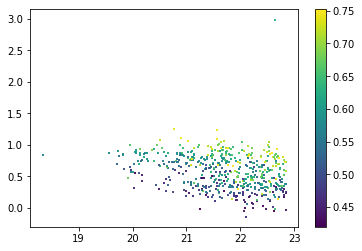

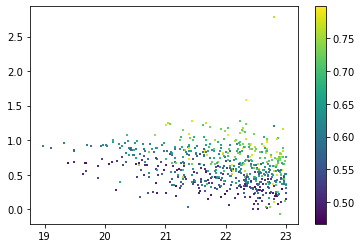

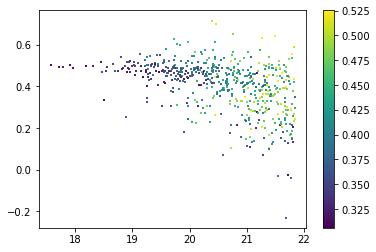

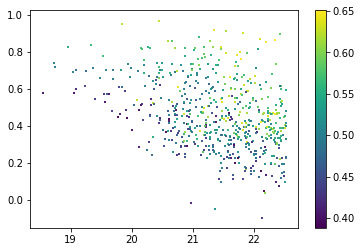

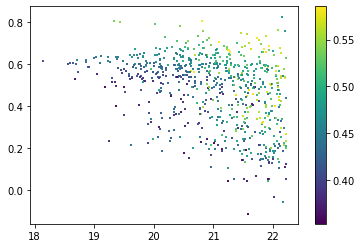

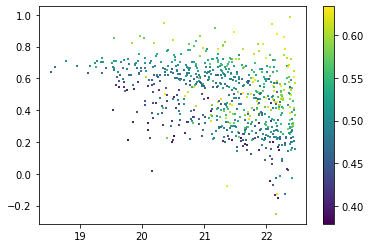

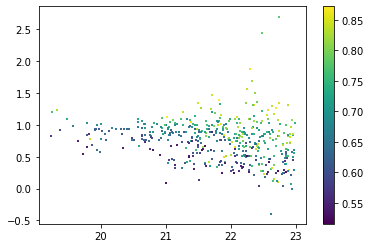

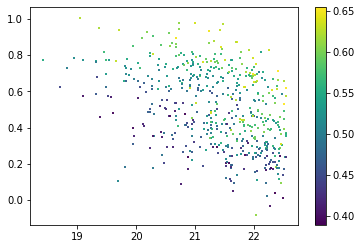

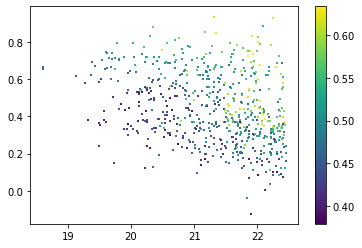

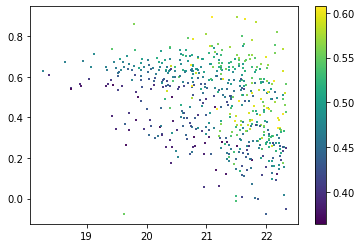

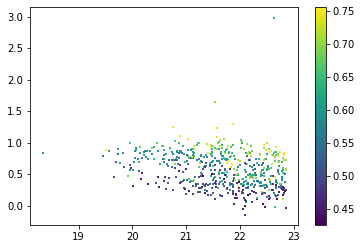

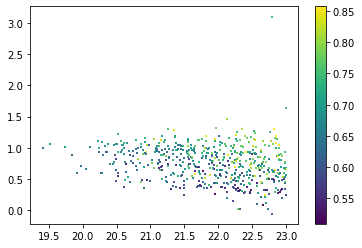

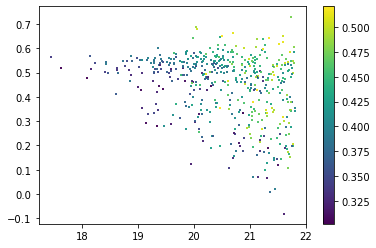

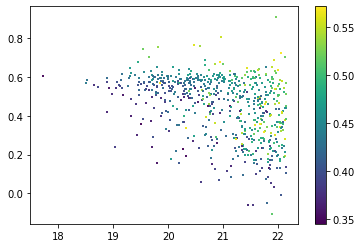

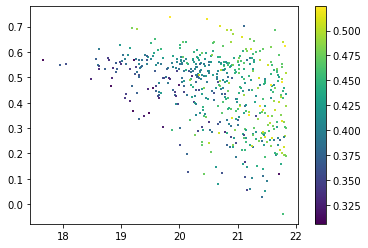

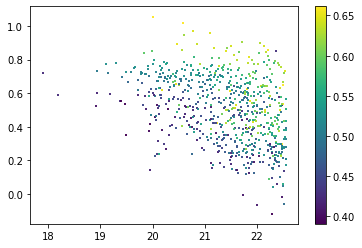

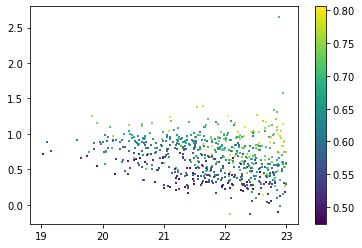

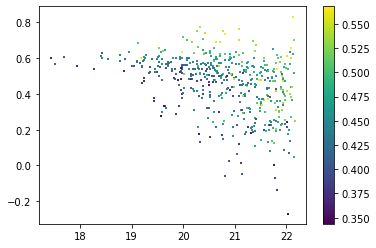

<Figure size 432x288 with 0 Axes>

In [86]:
#cluster_name = cluster_table_reduced['NAME'][0]
for cluster_name in cluster_table_reduced['NAME']:
    color = members_dict[cluster_name]['color_r_i']
    mag = members_dict[cluster_name]['mag_i']
    redshift = members_dict[cluster_name]['ZP']
    plt.scatter(mag, color, s = 1.0, marker = ',', c = redshift)
    plt.colorbar()
    plt.show()
    plt.clf()